In [184]:
! pip install kaggle

In [185]:
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [187]:
!kaggle competitions download -c acea-water-prediction -f Aquifer_Petrignano.csv

Aquifer_Petrignano.csv: Skipping, found more recently modified local copy (use --force to force download)


In [188]:

df = pd.read_csv("Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [189]:
# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [190]:
from datetime import datetime, date

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


In [191]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='Date')

# Check time intervals
df['Time_Interval'] = df.Date - df.Date.shift(1)

print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

Time_Interval
1 days    4198
Name: count, dtype: int64


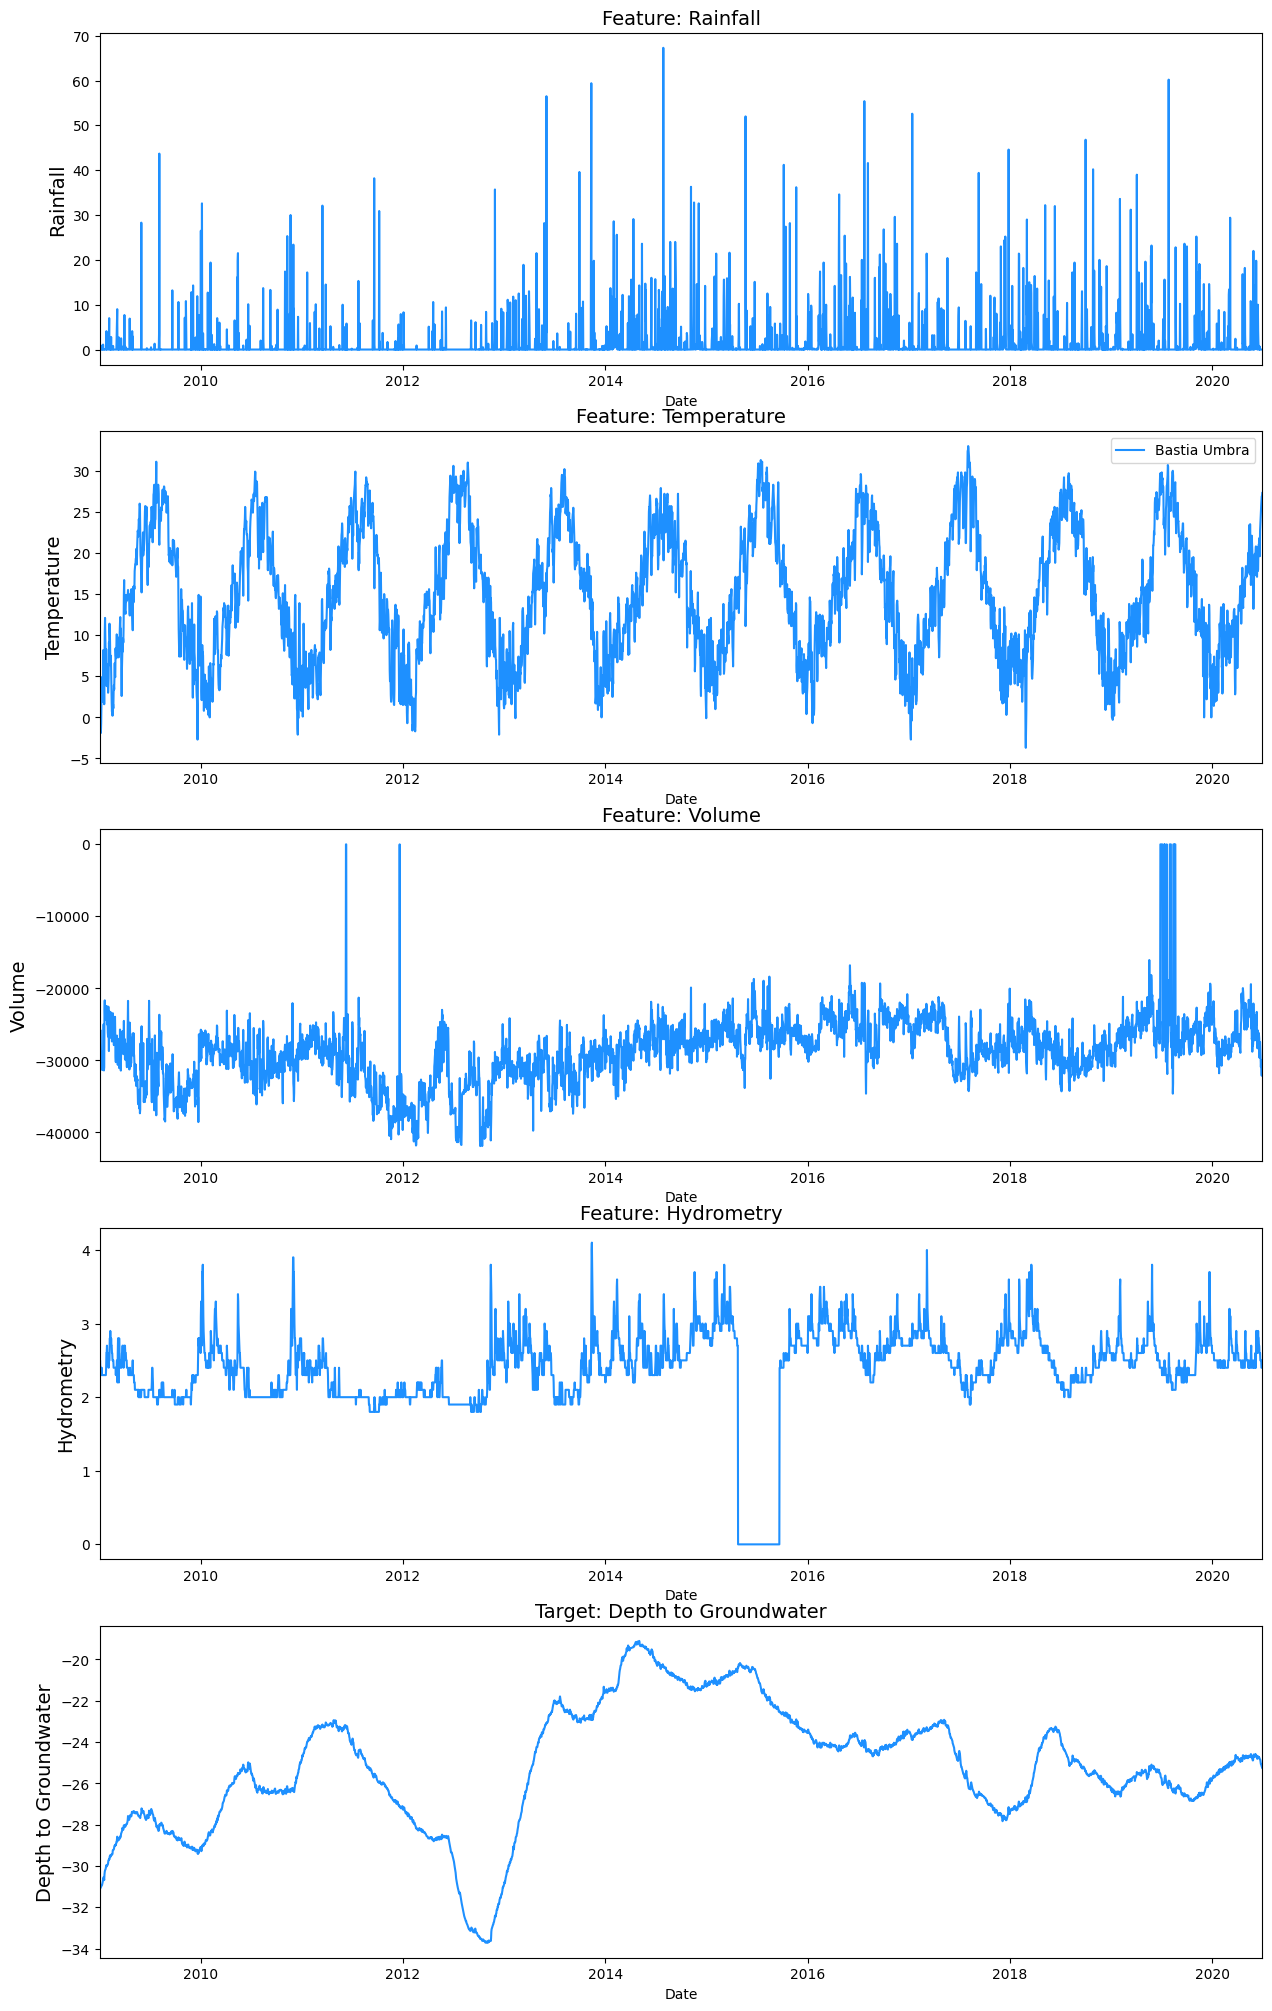

In [192]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.Date, y=df.Rainfall.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)


sns.lineplot(x=df.Date, y=df.Temperature.fillna(np.inf), ax=ax[1], color='dodgerblue',label='Bastia Umbra')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)


sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Volume', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)


sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Hydrometry', fontsize=14)
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)


sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Depth to Groundwater', fontsize=14)
ax[4].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

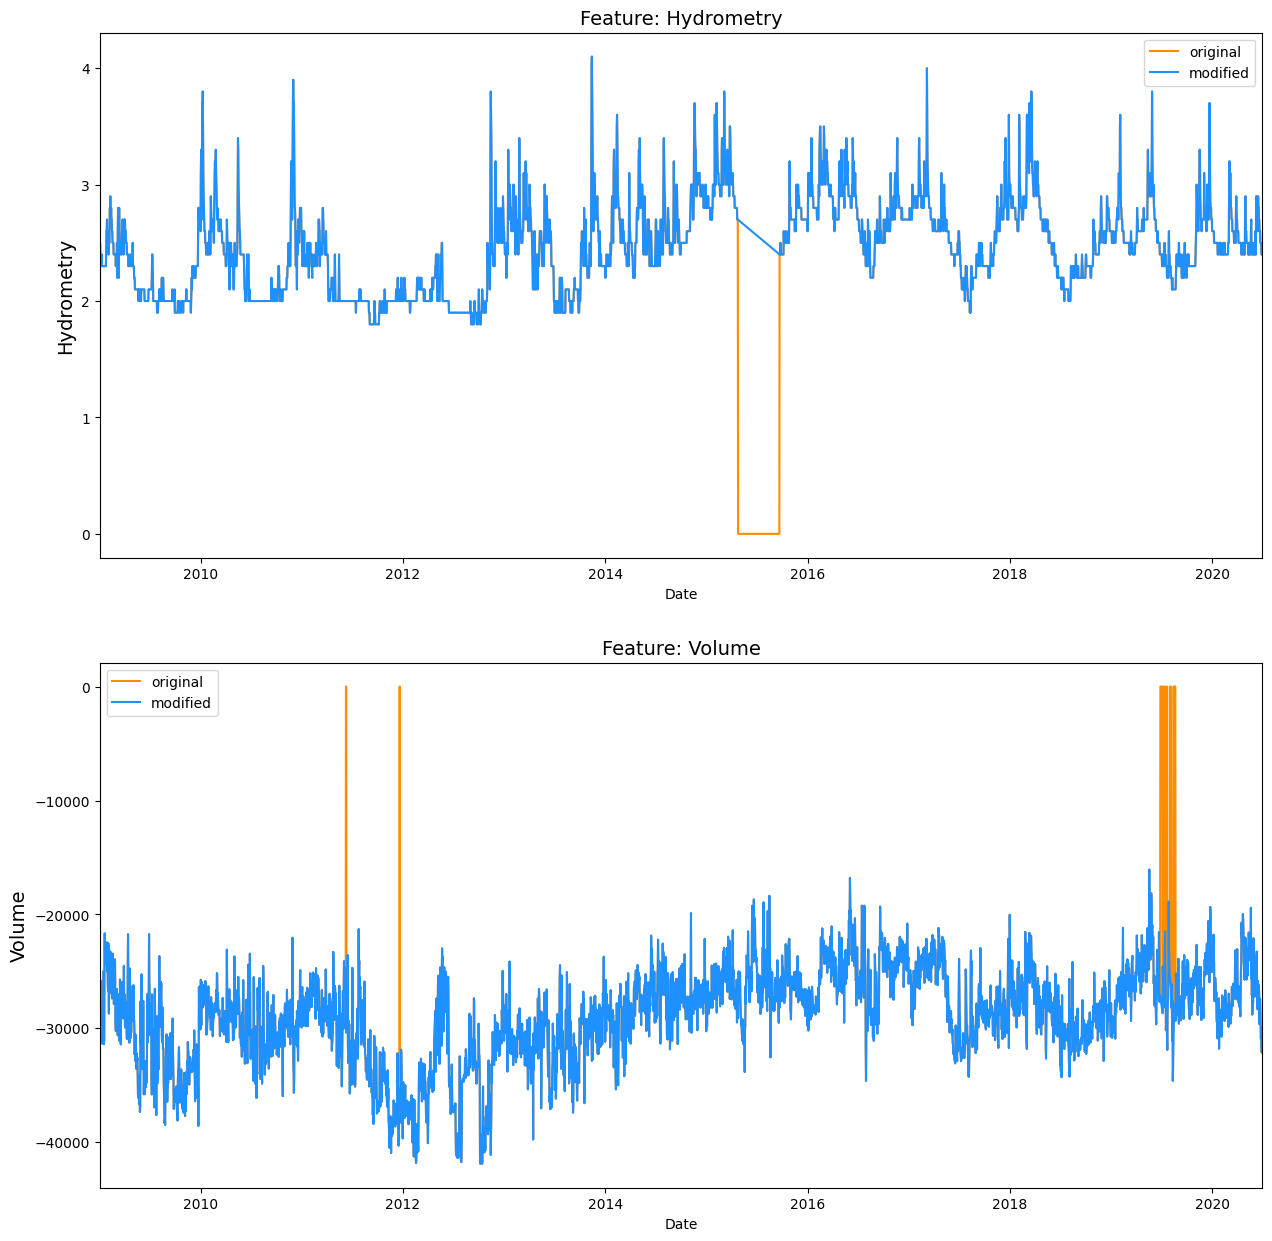

In [193]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = df.River_Hydrometry.copy()
df['River_Hydrometry'] = np.where((df.River_Hydrometry == 0),np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = df.Drainage_Volume.copy()
df['Drainage_Volume'] = np.where((df.Drainage_Volume == 0),np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)


for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()



In [194]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

In [195]:
df_weekly = df[['Date',
                     'Depth_to_Groundwater',
                     'Temperature',
                     'Drainage_Volume',
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_weekly['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]


1. Pominąć wszystkie wartości przed 2009 rokiem. +
2. Usunąć wartości odstające z danych. +
3. Przekształcić dane z dziennych na tygodniowe (uśrednić dane dla
każdego tygodnia).  ++
4. Model ma przewidywać pole Depth_to_Groundwater dla 4 tygodni w
przód (przewidywanie całej sekwencji przy pojedynczym odpytaniu sieci).
5. Wartościami wejściowymi do modelu mają być dane z wybranej liczby
poprzednich tygodni, przed tygodniami, dla których dokonujemy
predykcji (należy samemu dobrać ilość tygodni).
6. Wydzielić ze zbioru danych 40 ostatnich okresów czterotygodniowych, z
czego pierwsze 20 posłuży za zbiór walidacyjny, a drugie 20 za zbiór
testowy. Wszystkie dane przed nimi posłużą za zbiór treningowy.
7. Metryki i funkcję kosztu dobrać samodzielnie.

In [196]:
df_weekly.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
Date,600,2014-09-28 12:00:00,2009-01-01 00:00:00,2011-11-15 06:00:00,2014-09-28 12:00:00,2017-08-11 18:00:00,2020-06-25 00:00:00,NaN
Depth_to_Groundwater,600.0,-25.177987,-33.682857,-26.834643,-25.199286,-23.253929,-19.211429,2.953962
Temperature,600.0,15.032996,-0.514286,8.725,14.628571,21.35,31.628571,7.543682
Drainage_Volume,600.0,-28836.253817,-40828.937143,-30760.961143,-28351.296,-26424.329143,-20429.403429,3692.087477
River_Hydrometry,600.0,2.463603,1.8,2.157143,2.457143,2.7,3.457143,0.354375
Rainfall,600.0,10.893833,0.0,0.0,3.25,16.0,101.2,16.137287


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_output = 4
features = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

def create_dataset(data, n_input, n_output):
    X, y = [], []
    for i in range(len(data) - n_input - n_output):
        X.append(data[i:i + n_input])
        y.append(data[i + n_input:i + n_input + n_output, 1])  # Tylko Depth_to_Groundwater
    return np.array(X), np.array(y)
scaler = MinMaxScaler()
df_weekly[features] = scaler.fit_transform(df_weekly[features])


data = df_weekly[features].values
X, y = create_dataset(data, n_input, n_output)


train_size = len(X) - 40*4
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_val, X_test = X_test[:20*4], X_test[20*4:]
y_val, y_test = y_test[:20*4], y_test[20*4:]

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_gen = train_dataset.cache().batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_gen = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_gen = test_dataset.batch(1)



Epoch 1/200
14/14 [==============================] - 3s 26ms/step - loss: 0.4618 - mae: 0.6296 - val_loss: 0.3392 - val_mae: 0.5615
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4315 - mae: 0.6064 - val_loss: 0.3112 - val_mae: 0.5364
Epoch 3/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4015 - mae: 0.5834 - val_loss: 0.2857 - val_mae: 0.5126
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3698 - mae: 0.5576 - val_loss: 0.2619 - val_mae: 0.4892
Epoch 5/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3472 - mae: 0.5389 - val_loss: 0.2392 - val_mae: 0.4656
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3205 - mae: 0.5162 - val_loss: 0.2171 - val_mae: 0.4415
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2965 - mae: 0.4951 - val_loss: 0.1956 - val_mae: 0.4167
Epoch 8/200
14/14 [==============================] - 0s 8ms/step - loss: 0.2718 - 

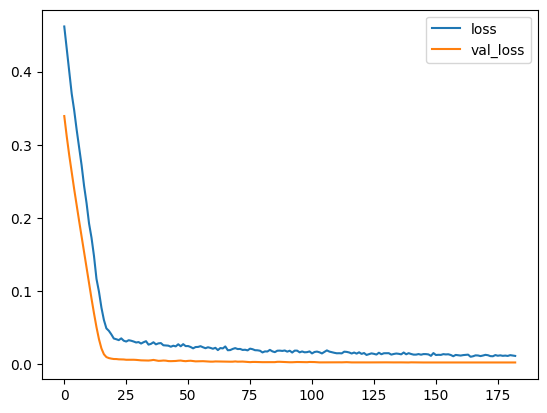

In [224]:
model = tf.keras.Sequential([
    LSTM(units=16, activation='relu',input_shape=(n_input, len(features))),
    Dropout(0.2),
    Dense(64, activation='leaky_relu'),
    Dense(n_output)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse', metrics=['mae'])



rnn_early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, verbose=1)

history = model.fit(train_gen, validation_data=val_gen, epochs=200,callbacks=[rnn_early_stopping])

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [225]:

predictions = model.predict(test_gen)
depth_scaler = MinMaxScaler()
depth_scaler.min_, depth_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

predictions = depth_scaler.inverse_transform(predictions)
true_values = depth_scaler.inverse_transform(y_test)


80/80 [==============================] - 0s 2ms/step


MAE for t+1: 0.03899311274290085
MAE for t+2: 0.03902449086308479
MAE for t+3: 0.03665843978524208
MAE for t+4: 0.05691298097372055


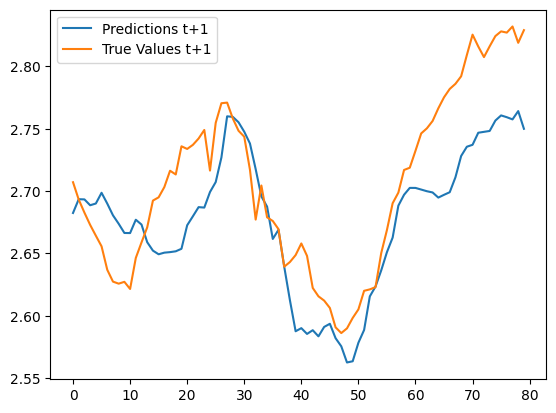

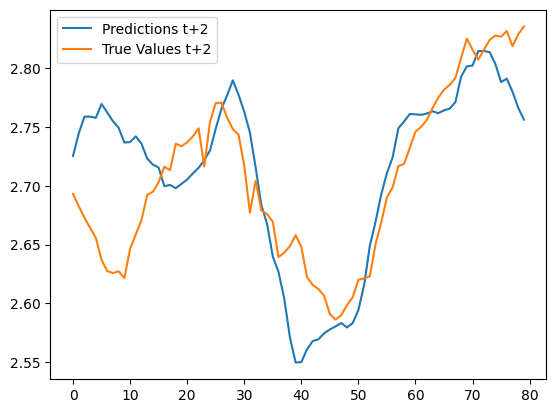

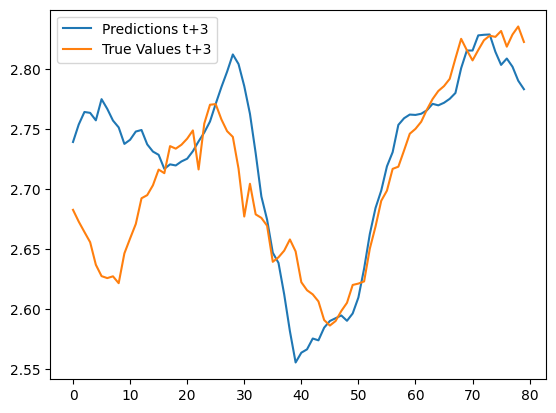

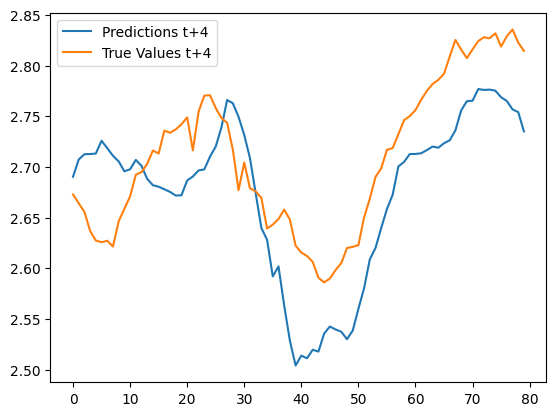

In [226]:

for i in range(0,4):
  print(f'MAE for t+{i+1}: {tf.keras.metrics.mean_absolute_error(true_values[:, i], predictions[:, i]).numpy()}')

for i in range(0,4):
  plt.plot(predictions[:, i], label=f'Predictions t+{i+1}')
  plt.plot(true_values[:, i], label=f'True Values t+{i+1}')
  plt.legend()
  plt.show()


In [228]:
model.evaluate(test_gen)

80/80 [==============================] - 0s 3ms/step - loss: 0.0010 - mae: 0.0259


[0.0010439443867653608, 0.025886287912726402]

In [232]:


def model_compile_fit(model,epochs=200,patience=20,learning_rate=0.0001):
  model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse', metrics=['mae'])



  rnn_early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)

  history = model.fit(train_gen, validation_data=val_gen, epochs=epochs,callbacks=[rnn_early_stopping])

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

def model_eval(model):
  model.evaluate(test_gen)

  predictions = model.predict(test_gen)
  depth_scaler = MinMaxScaler()
  depth_scaler.min_, depth_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

  predictions = depth_scaler.inverse_transform(predictions)
  true_values = depth_scaler.inverse_transform(y_test)


  for i in range(0,4):
    print(f'MAE for t+{i+1}: {tf.keras.metrics.mean_absolute_error(true_values[:, i], predictions[:, i]).numpy()}')

  for i in range(0,4):
    plt.plot(predictions[:, i], label=f'Predictions t+{i+1}')
    plt.plot(true_values[:, i], label=f'True Values t+{i+1}')
    plt.legend()
    plt.show()


Epoch 1/100
14/14 [==============================] - 5s 79ms/step - loss: 0.3931 - mae: 0.5865 - val_loss: 0.2714 - val_mae: 0.5132
Epoch 2/100
14/14 [==============================] - 0s 30ms/step - loss: 0.3570 - mae: 0.5572 - val_loss: 0.2371 - val_mae: 0.4787
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.3115 - mae: 0.5189 - val_loss: 0.1966 - val_mae: 0.4340
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2611 - mae: 0.4727 - val_loss: 0.1470 - val_mae: 0.3717
Epoch 5/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1960 - mae: 0.4054 - val_loss: 0.0876 - val_mae: 0.2782
Epoch 6/100
14/14 [==============================] - 0s 19ms/step - loss: 0.1168 - mae: 0.3017 - val_loss: 0.0310 - val_mae: 0.1522
Epoch 7/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0545 - mae: 0.1923 - val_loss: 0.0185 - val_mae: 0.1004
Epoch 8/100
14/14 [==============================] - 0s 18ms/step - loss: 0.

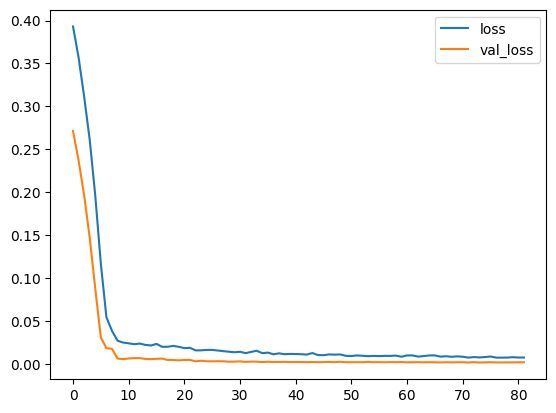

In [250]:
model2 = tf.keras.Sequential([
    LSTM(units=100, activation='relu', return_sequences=True, input_shape=(n_input, len(features))),
    LSTM(units=50, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='leaky_relu'),
    Dense(n_output)
])

model_compile_fit(model2,100,10)

80/80 [==============================] - 1s 4ms/step
MAE for t+1: 0.041956186294555664
MAE for t+2: 0.04984910786151886
MAE for t+3: 0.04823866859078407
MAE for t+4: 0.0499860942363739


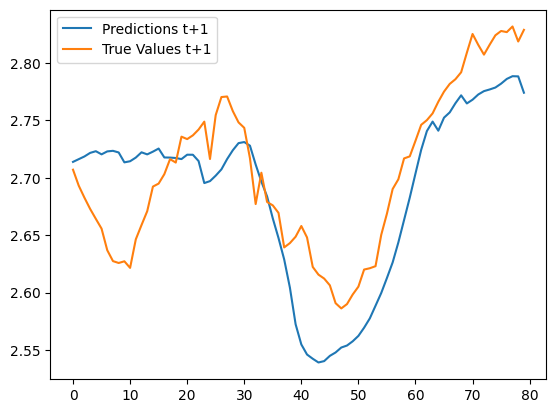

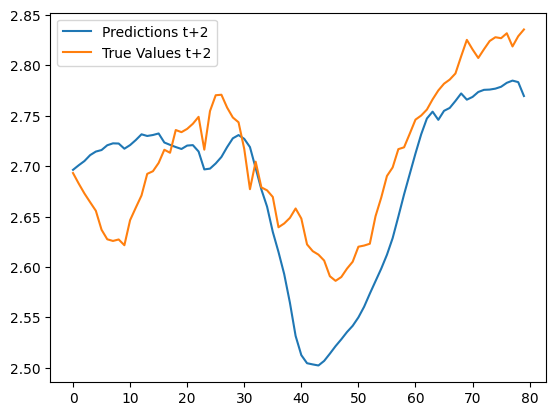

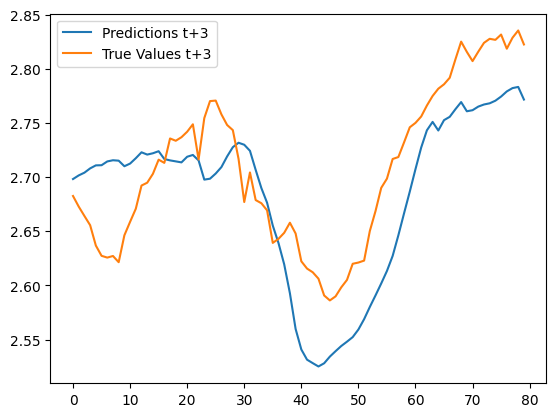

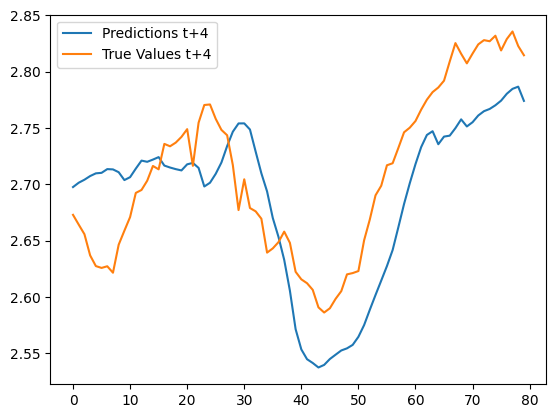

In [251]:
model_eval(model2)